# ReD-DeLiVeR Tutorial

The ReD-DeLiVeR code is a pythonic library developed for the study of models with vector mediators with generic charges, specially for the case where such bosons are light, for which the library includes the possibility of decays into more than 20 different hadronic channels. The code also features the inclusion of dark matter (DM) candidates, which can be simplified dark matter realizations, or the inelastic DM (iDM) case. Finally, the code can be used to compute the DM relic density, and thermal targets, given the initial choices of coupling and masses. 

Additional information about the code can also be found in Appendix C of [iDM paper](https://arxiv.org/abs/2410.00881).

### Import modules

In [1]:
# general 
import os, sys, inspect, collections
import math,time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#specific
import src.chan as ch #channels
import src.pars as par #parameters
from src import width_inel as winel #Inelastic DM width
import src.vecdecays as vd # Vector decays

# relic density main module
import relic_density as rdn

## Decay Widths and Branching Ratios

Let us start by computing some decay widths and branching ratios of the vector mediator and also for the heavier dark fermion, in the case of the inelastic DM model.

### Vector Mediator

The first thing we need is to choose the model $Q$ charges of the abelian $U(1)_Q$ gauge extension. <br> 
The charges $q_Q^f$, given by equations (8) and (10) of [iDM paper](https://arxiv.org/abs/2410.00881), are set via an array in the format $[q_Q^d,q_Q^u,q_Q^s,q_Q^c,q_Q^b,q_Q^t,q_Q^e,q_Q^\mu,q_Q^\tau,q_Q^{\nu_e},q_Q^{\nu_\mu},q_Q^{\nu_\tau}]$, respecting this given fermion $f$ assignment order.

For instance, let us consider the $Q= B-L$ model. Below we have the correspoding charge assignments.

In [3]:
coup = [1./3,1./3,1./3,1./3,1./3,1./3,-1,-1,-1,-1,-1,-1]

We also need to choose a name to the model:

In [4]:
name= "BL_model_tutorial"

Now, we can choose if we want (or not) to add a DM candidate. The possible options are:

In [5]:
ch.allDMtypes 

['complex scalar',
 'Majorana',
 'Majorana fermion',
 'Dirac',
 'Dirac fermion',
 'inelastic',
 'No']

The option "No" represent no DM candidate.

In this example, we wil choose the inelastic DM scenario. In this specific case we also need to set an splitting $\Delta$ parameter, as given by equation (5) [iDM paper](https://arxiv.org/abs/2410.00881).

In [6]:
iDM = "inelastic"
delta = 0.4

Finally, we need to choose the mass splitting $R = m_V/m_{DM}$ between the mediator $m_V$ and DM $m_{DM}$ masses.

In [7]:
Rval = 3

Now, we can call the main `Model` class which receives as input the name of the model, the coupling charge array, the DM type string, the splitting value (for the case of iDM) and the $R$ ratio value.
Optionally, the user can aso set a value `mhad` in GeV for the hadron-quark transition. If not specified, the code will compute such trasition automatically. The user also can set a `folder` string name where to save the output files. The defautl folder is the `\models` directory.

In [8]:
BLmodel = vd.Model( name, coup, DMtype= iDM, split= delta, Rrat= Rval, mhad= None, folder = "models")

In [9]:
print ("The name of the model is", BLmodel.modelname, "and the DM type is", BLmodel.DM)

The name of the model is BL_model_tutorial and the DM type is inelastic


In this case the .txt files, the plots and the DM files will be saved, respectively, in

In [9]:
BLmodel.modfolder,BLmodel.plotfold,BLmodel.dmfolder

('models/BL_model_tutorial',
 'models/BL_model_tutorial/plots',
 'models/DM_model')

Now, we can compute the normalized widths (gauge couplings set to 1) via the function `calcnormwid` or also compute directly the width, given the couplings, with `calcwid`. <br>

Both functions posses as inputs the initial and final mediator mass values, `mmin` and `mmax`, respectively, and also the number of points, `step`, that will be computed in linear steps. The default values for those parameters are shown below.

In [53]:
BLmodel.calcnormwid(mmin=1e-3 ,mmax=10.0, step=10000)

Using hadronic width file...


If, besides, one wants to choose a specific array of masses, it can use the `marr` option:

In [11]:
BLmodel.calcnormwid(marr = np.geomspace(1e-3,10,100000))

Using hadronic width file...


In the case where the code finds a hadronic width file already computed in the `BLmodel.modfolder` directory, it will use it. If not, it will compute the hadronic decays and save the file. 

After this computation, the code generates the .txt files for the normalized widths. In the `BLmodel.modfolder` folder, it saves three different files corresponding to the fermionic and hadronic widths organized by channel, along with a final file that compiles the widths into four categories: QCD (quarks and hadrons), charged leptons, neutrinos, and total. It will also create a file in the `BLmodel.dmfolder`  directory that contains the normalized widths into the selected DM candidate.

The method also generates the following instance attributes that are dictionaries containing the interpolated width functions $\Gamma(m_V)$ into:

- `<model>.wfermN` : individual fermionic channels

- `<model>.whadN` : individual hadronic channels

- `<model>.wsmN` : QCD (hadrons+quarks), charged leptons, neutrinos and the total width (without DM).

- `<model>.wdmN` : the choosen DM candidate

In [54]:
print (BLmodel.wfermN.keys())
print (BLmodel.wfermN['e_e'](2))

dict_keys(['e_e', 'mu_mu', 'tau_tau', 'nue_nue', 'numu_numu', 'nutau_nutau', 'quarks'])
0.053051647697297075


In [13]:
print (BLmodel.whadN.keys()) # this is a list of the possible hadronic channels
print (BLmodel.whadN['PiGamma'](1.3))

dict_keys(['2pi', '3pi', 'PiGamma', 'EtaGamma', 'EtaOmega', 'EtaPhi', 'PhiPi', 'OmegaPion', 'EtaPiPi', 'EtaPrimePiPi', '4pi', '6pi', 'KK', 'KKpi', 'KKpipi', 'PhiPiPi', 'OmPiPi', 'NNbar', 'tothad'])
4.290488163036965e-05


In [14]:
print (BLmodel.wsmN.keys())
print (BLmodel.wsmN['QCD'](1))

dict_keys(['QCD', 'chlep', 'neutrinos', 'total'])
0.005395372446348471


In [15]:
print ('The DM type is', BLmodel.DM)
print (BLmodel.wdmN)
print (BLmodel.wdmN['DM'](1))

The DM type is inelastic
{'DM': <scipy.interpolate.interpolate.interp1d object at 0x7fc1785a01d0>}
0.02045072440619059


The computed arrays containing the values of mass and computed widths can also be acessed via:

In [16]:
print (BLmodel.wsmN_arr.keys())
print (BLmodel.wfermN_arr.keys())
print (BLmodel.whadN_arr.keys())
print (BLmodel.wdmN_arr.keys())

dict_keys(['QCD', 'chlep', 'neutrinos', 'total'])
dict_keys(['e_e', 'mu_mu', 'tau_tau', 'nue_nue', 'numu_numu', 'nutau_nutau', 'quarks'])
dict_keys(['2pi', '3pi', 'PiGamma', 'EtaGamma', 'EtaOmega', 'EtaPhi', 'PhiPi', 'OmegaPion', 'EtaPiPi', 'EtaPrimePiPi', '4pi', '6pi', 'KK', 'KKpi', 'KKpipi', 'PhiPiPi', 'OmPiPi', 'NNbar', 'tothad'])
dict_keys(['DM'])


Now, to compute the width for specific choices of $U(1)_Q$ gauge coupling $g_Q$ and DM coupling $g_{DM}$ we can use

In [73]:
BLmodel.calcwid(gQ= 1e-3, gDM=1, mmin=1e-3 ,mmax=10.0, step=10000 )

Using hadronic width file...


Similarly, this command generates the instance attributes

- `<model>.wferm`
- `<model>.whad`
- `<model>.wsm`
- `<model>.wdm` 

with the widths computed for the given couplings, and also `<model>.wtot` for the total width including SM and DM channels.

In [18]:
print (BLmodel.wsm.keys())
print (BLmodel.wsm['neutrinos'](0.3))

dict_keys(['QCD', 'chlep', 'neutrinos', 'total'])
1.1936620731892147e-08


In [19]:
print (BLmodel.wtot(2))

0.04090169201234385


Now that we computed the decay widths it is easy to compute the branching ratios, via:

In [74]:
BLmodel.calcbr(gQ= 1e-3, gDM=1, mmin=1e-3 ,mmax=10.0, step=10000)

Using hadronic width file...


which generates the attributes

- `<model>.brferm`
- `<model>.brhad`
- `<model>.brsm`
- `<model>.brdm` 

In [21]:
# example
BLmodel.brhad['KK'](1)

array(1.46459709e-07)

If you want to save the BRs you can use the command `save_br()`, which will produce four files inside `<BLmodel.modfolder>\br` containing the BR values into the DM candidate, the fermionic channels, the hadronic channels and the SM categories ( QCD, charged leptons, neutrinos and total SM).

In [22]:
BLmodel.save_br()

#### Plots

Now, we can plot the widths and branching ratios of the vector mediator. <br>

The function to plot the width is defined as <br>
`plotwid(self,xrange=[0.1,2.],yrange=[1e-9,2.], name=None, Wsingle_had=[],Wsingle_ferm=[], W_DM=True)` 

where

- `xrange` and `yrange` define the x-axis and y-axis ranges
- `name` accepts strings and if specified will save the plot inside the directory `BLmodel.plotfold`.
- `Wsingle_had` and `Wsingle_ferm` are arrays where one can specify individual dhadronic and fermionic channels to plot, respectively.
- if `W_DM` is `True` it will plt the DM wisth also


Below there is a list with the possible options of individual channels that we can specify and a plotting example.

In [23]:
labelhad = ["2pi","3pi","PiGamma","EtaGamma","EtaOmega","EtaPhi","PhiPi","OmegaPion","EtaPiPi",
            "EtaPrimePiPi","4pi","6pi","KK","KKpi","KKpipi","PhiPiPi","OmPiPi","NNbar"]
labelchlep = ["e_e","mu_mu", "tau_tau"]
labelnu = ["nue_nue","numu_numu","nutau_nutau"]

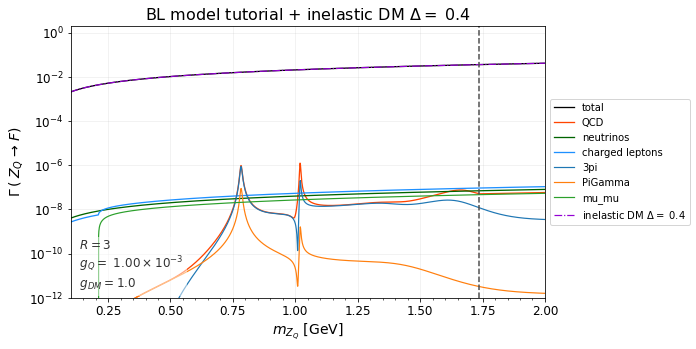

In [24]:
BLmodel.plotwid(xrange=[0.1,2.],yrange=[1.e-12,2.], Wsingle_had=["3pi","PiGamma"],Wsingle_ferm=["mu_mu"],name="plot");

Similarly, the function to plot the branching ratios is defined as <br>

`plotbr(self,xrange=[0.1,2.],yrange=[1.e-3,2.], BRsingle_had=[],BRsingle_ferm=[],BR_DM=True,name=None)` 

with the same inputs as before

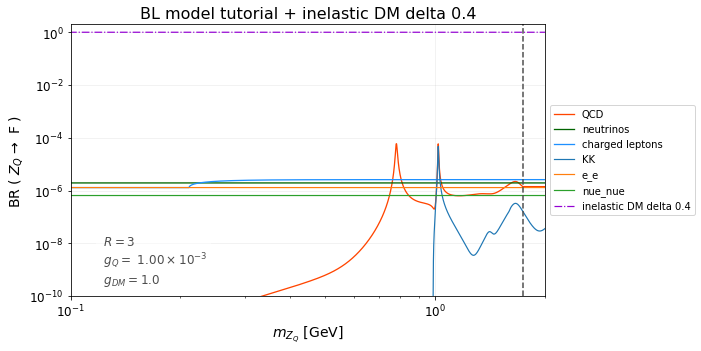

In [25]:
BLmodel.plotbr(xrange=[0.1,2.],yrange=[1.e-10,2.], BRsingle_had=["KK"],BRsingle_ferm=["e_e","nue_nue"],
               BR_DM=True,name="plotBR");

### iDM - Heavier Dark Fermion

For the scenario of inelastic DM we can also compute the widths and branching ratios of the heavier dark fermion $\chi_2$ wich can decay into $\chi_1$ (the DM candidate) and SM final states via three-body decays with off-shell mediators.

First, we can compute the normalized $\chi_2$ widths via the function <br>

`calcnormwidChi2(self, channels = None, mmin=1e-1 ,mmax=3.0, step=1000, save= False)` 

where `channels` can be choosen between `["e_e", "mu_mu", "tau_tau","nue_nue", "numu_numu", "nutau_nutau","piGamma", "KK", "pipi"]`, and, if not specified, all of the channels will be considered, the `mmin` and `mmax` are the minima and maxima values of the **mass of the DM candidate $m_{\chi_1}$** in GeV, the number of points to be computed is `step` and if the option `save` is `True` the widths are saved in the `BLmodel.modfolder` directory.
 
 

In [26]:
BLmodel.calcnormwidChi2(channels = ['e_e','mu_mu','tau_tau','neutrinos','piGamma'],
                        mmin=1e-1 ,mmax=2.0, step=100, save=True)

Using width file...


This method creates the instance `<model>.wchi2N` which is a dictionary cotaining the interpolated $\chi_2$ normalized widths into the selected channels.

In [27]:
print (BLmodel.wchi2N.keys())
print (BLmodel.wchi2N["neutrinos"](1))

dict_keys(['e_e', 'mu_mu', 'tau_tau', 'neutrinos', 'piGamma', 'total'])
6.494669966321827e-08


As before, there is also a function to compute the width for given choices of couplings and that creates teh instance `<model>.wchi2N`. 

In [28]:
BLmodel.calcwidChi2(gQ= 1e-4, gDM=0.1, channels = ['e_e','mu_mu','tau_tau','neutrinos','piGamma'])

Using width file...


In [29]:
print (BLmodel.wchi2.keys())
print (BLmodel.wchi2["piGamma"](1))

dict_keys(['e_e', 'mu_mu', 'tau_tau', 'neutrinos', 'piGamma', 'total'])
8.759045312184576e-23


Now, we use the `plotNwidChi2(self,xrange=[0.1,2.],yrange=None, name=None)` function to plot the widths, where if the option name is specified with a string, the code saves the plot in `BLmodel.plotfold`.

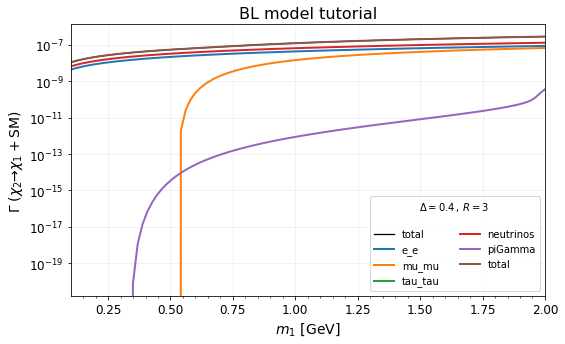

In [30]:
BLmodel.plotNwidChi2(xrange=[0.1,2.],yrange=None, name="wChi2");

## Relic Density

Finally, we are ready to compute the freeze-out curves and relic densities. For this purpose we will use the main module `relic_density.py`.

The `Boltzmann` Class inherits all the variables from the `Model` Class, with the addition of the following extra parameters:

- `dof` which represents the number of degrees of freedom of the DM candidate
- `mDM` is the DM mass
- `gQ` is the $U(1)_Q$ gauge coupling
- `gDM` is the mediator-DM coupling

In [8]:
BLmodelRD = rdn.Boltzmann(name, coup, DMtype= iDM, split= 0.1, Rrat=Rval, mhad= None, 
                          dof = 2, mDM=1., gQ=1., gDM=1)

Using hadronic width file...

 Calculating the hadron-quark transition...
The transition from hadrons to quarks will happen at 1.736 GeV.


If you want to reset the model free parameters {`mDM`,`gQ`,`gDM`} you can use the function `set_DM()`. <br>
Let us fix the structure constant $\alpha_D = \frac{g_{DM}^2}{4\pi}$ to 0.1 and the gauge coupling to a value that will correctly freeze-out the iDM, for the choosen model free parameters, into the observed DM relic abundance of $\Omega h^2 = 0.12$.

In [9]:
alphaD = 0.1
gDMnew = np.sqrt(4*np.pi*alphaD)

gQnew = 6.38e-4

In [10]:
BLmodelRD.set_DM(mDM=1.,gQ=gQnew,gDM=gDMnew)

Using hadronic width file...


For the case of inelastic DM, to compute the relic density $\Omega h^2$ you can use the `relic_density_idm(self,xi=10.,xf=50.)` function, where (`xi`,`xf`) represent the initial and final values of the variable $x = m_x/T$ that will be used to solve the system of differential Boltzmann equations. By convention, in the case of iDM $m_x=m_{\chi_2}$, while for the other DM candidates we have $m_x = m_{DM}/T$.

In [12]:
BLmodelRD.relic_density_idm(xi=1.,xf=100.)

relic =  0.1199903368435045 for mV= 3.0  and gQ= 0.000638


0.1199903368435045

After the computation, one can access the relic density value and the Boltzmann equation solution for the arrays of the comoving number density $Y = n/s$ and the time evolution parameter $x=m_x/T$ via the instances `BLmodelRD.relicidm` and `BLmodelRD.boltzidm`. 

In [13]:
print ("The computed relic density was", BLmodelRD.relicidm)

The computed relic density was 0.1199903368435045


In [14]:
xarr = BLmodelRD.boltzidm.x # x values array
Y1arr =BLmodelRD.boltzidm.y[0] # Y1 values array
Y2arr = BLmodelRD.boltzidm.y[1] # Y1 values array

For the other DM models, you can use the function `relic_density_dm(self,xi=10.,xf=50.)`. Besides, in the case of iDM, you can also use this function to compute the Boltzmann equation using the coannihilation approximation (see equation (23) of [iDM paper](https://arxiv.org/abs/2410.00881) ), which can solve for the relic density faster.

In [15]:
BLmodelRD.relic_density_dm(xi=1.,xf=100.)

relic =  0.12157469758130289 for mV= 3.0  and gQ= 0.000638


0.12157469758130289

As before, you can access the results via the instances `BLmodelRD.relicdm` and `BLmodelRD.boltzdm`.

### Cosmology

The `Boltzmann` Class also inherits the functions from the `Cosmology` class. 
For example:

- `Hubble(self,x)` corresponds to the Hubble rate as a function of $x= m_{DM}/T$.
- `entropyS(self,T)` corresponds to the entropy as a function of temperature as a function of $x= m_{DM}/T$.
- `geff_s(self,x)` corresponds to the number of relativistic degrees of freedom 
- `nequil(self, x, meq, dof)` corresponds to the equilibrium abundance, as given by eq.(17) of [iDM paper](https://arxiv.org/abs/2410.00881).


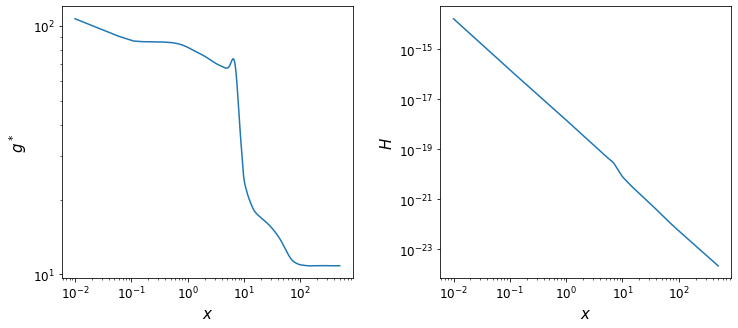

In [76]:
fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(12, 5))
plt.rcParams.update({'font.size': 14,'axes.labelsize': 15,'ytick.labelsize': 12,'xtick.labelsize': 12})
xarr= np.linspace(0.01,500,10000)
ax_left.plot(xarr,BLmodelRD.geff_s(xarr))
ax_right.plot(xarr,BLmodelRD.Hubble(xarr))
ax_left.set( xlabel='$x$', ylabel='$g^*$', xscale='log', yscale='log')
ax_right.set( xlabel='$x$', ylabel='$H$', xscale='log', yscale='log')
fig.subplots_adjust(wspace=0.3)

### Plot

To plot the freeze-out curve, one can use the fucntion <br>

`plot_FO(self, xlim = (1,200), ylim = (1e-16,1e-1), ptype = "Y1Y2", name=None)`

where

- `xlim` and `ylim` represent the $x$ and $y$ axis ranges
- `ptype` can be choosen between `['Y1Y2', 'Ychi', 'both']`:
    - 'Y1Y2' correspods to the solution of the full Boltzmann computation for the iDM case.
    - 'Ychi' corresponds to the solution of the other DM cases or the coannihilation approximation for the iDM case.
    - 'both' will plot both solutions in the iDM scenario.
    
- if `name` is specified, the function will save the plot in the new directory `\models\<model_name>\relic`.

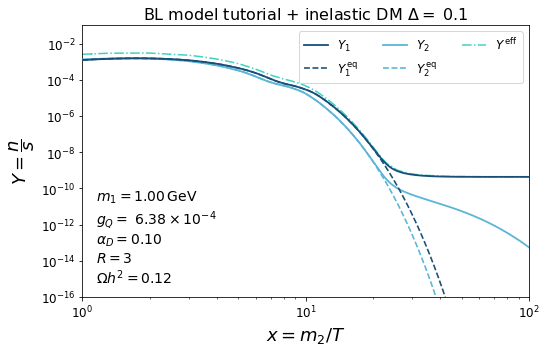

In [18]:
BLmodelRD.plot_FO(xlim = (1,100), ylim = (1e-16,1e-1), ptype = "both", name="FOtest")

### Thermal Rates

The `Boltzmann` class also includes a function to compute the thermal rates $\Gamma = \langle \sigma v \rangle \, n $, which can be used after the relic density computation:

`calc_rates(self,fermion= ["e", "nue", "numu", "nutau"], xlim= (1,200,200))`

- `fermion` sets the fermions that will be used in the computation of the DM-fermion scattering rate \[see panel (c) of Figure 4 of [iDM paper](https://arxiv.org/abs/2410.00881)]. For the case of non-iDM, this channel is important for the thermal equilibrium between the SM and Dark Sector baths.



